Text(0.5, 1.0, 'Dados do Rio de Janeiro e modelo SIR com R0: 1.207 e 0.975.')

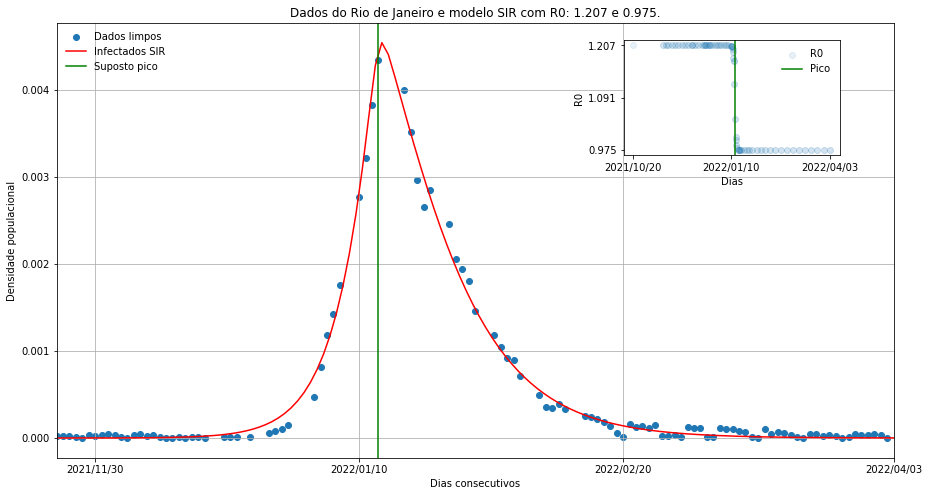

In [243]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 615
leste = 780

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  700

coef_sub = 0.207  # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.025

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,leste-oeste)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label='Suposto pico')
#ax.plot(list_t, list_R0)

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
label2 = [dados0.loc[oeste]['Datas'],dados0.loc[meio]['Datas'],dados0.loc[leste]['Datas']]
ax2.set_xticks([oeste,meio,leste], labels=label2)
ax2.legend(frameon=False)

#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([650,780])
ax.set_title(f'Dados do Rio de Janeiro e modelo SIR com R0: {coef_sub + 1} e {coef_des + 1}.')

Text(0.5, 1.0, 'Dados do Rio de Janeiro, modelo SIR com R0: 1.16 e 0.9 e população de 180000000.')

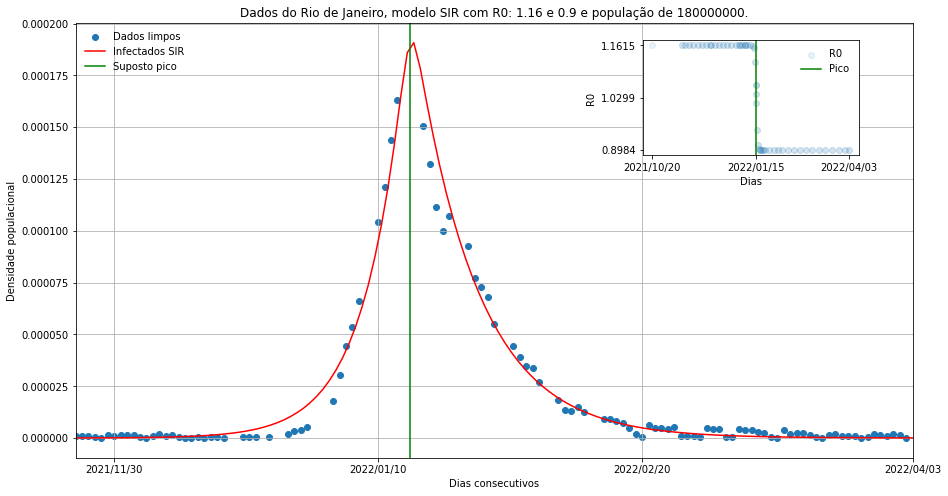

In [355]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 180000000 #6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 615
leste = 780

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  702

coef_sub = 0.1615219031945897 
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 8e-11
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,leste-oeste)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()



##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label='Suposto pico')
#ax.plot(list_t, list_R0)



ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
label2 = [dados0.loc[oeste]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[leste]['Datas']]
ax2.set_xticks([oeste,t_pico,leste], labels=label2)
ax2.legend(frameon=False)


#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([650,780])
ax.set_title(f'Dados do Rio de Janeiro, modelo SIR com R0: {round(coef_sub + 1,2)} e {round(coef_des + 1,2)} e população de {população}.')

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1217927061282D+11   r2 =  0.2508209119123D+02


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


(0.0, 1e-07)

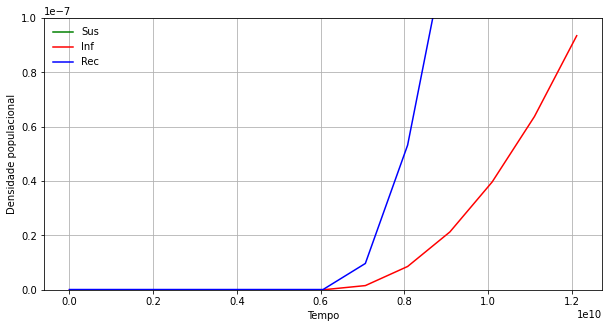

In [344]:
# Testando I0

# SIR
list_t = []
list_R0 = []

def sir(t, y):
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media

    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_t.append(t)
    list_R0.append(R0)
    return dsdt, didt, drdt

t_pico =  1000000000000

coef_sub = 0.1615219031945897 
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2
assintotas = coef_sub - media

t0, t = 0, 1e+11
i0 = np.exp(-118.48)
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_ylim([0,1e-7])


Text(0.5, 1.0, 'Dados do Rio de Janeiro, modelo SIR com R0: 1.16 e 0.9 e população de 6775561.')

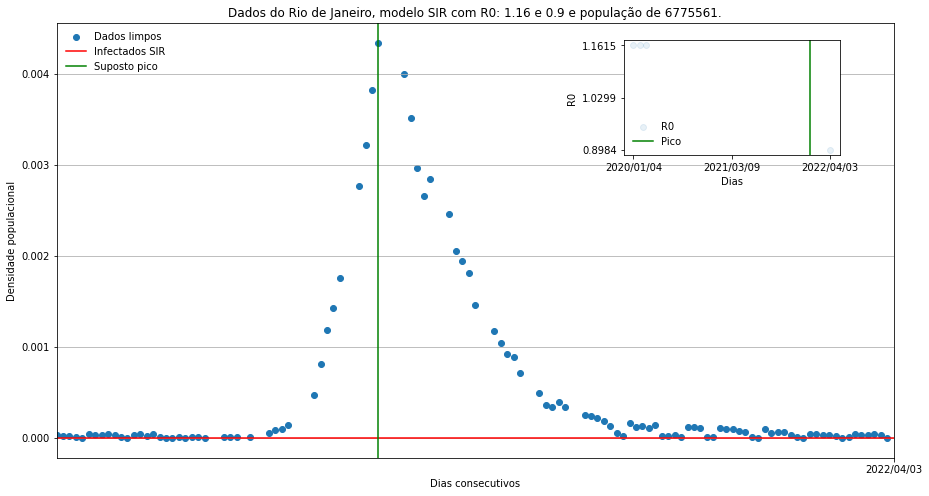

In [314]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561 #6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 0
leste = 780

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  700

coef_sub = 0.1615219031945897 
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
#i0 = 4e-6
i0 = np.exp(-118.48)
r0 = 1e-10
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,leste-oeste)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label='Suposto pico')
#ax.plot(list_t, list_R0)

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
label2 = [dados0.loc[oeste]['Datas'],dados0.loc[meio]['Datas'],dados0.loc[leste]['Datas']]
ax2.set_xticks([oeste,meio,leste], labels=label2)
ax2.legend(frameon=False)


#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([650,780])
ax.set_title(f'Dados do Rio de Janeiro, modelo SIR com R0: {round(coef_sub + 1,2)} e {round(coef_des + 1,2)} e população de {população}.')

In [313]:
res.y[1]

array([ 3.50582137e-52,  9.85998917e-52,  1.62141570e-51, ...,
       -3.50678760e-44, -3.51053942e-44, -3.51429326e-44])

[1.2200000000000002, 0.98, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 0.9800000000000001, 0.98, 0.98, 0.98, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2199999999999906, 1.2199999999999906, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2200000000000002, 1.2199999972135223, 1.2199997586970752, 1.2199362717561857, 1.2199362717561857, 1.2200000000000002, 1.2200000000000002, 1.2199999999999895, 1.21999999999977, 1.219999999989252, 1.219999999989252, 1.2200000000000002, 1.2200000000000002, 1.22, 1.2199999999999973, 1.2199999999999256, 1.2199999999999256, 1.2199999999821458, 1.2199999997234843, 1.219753864734923, 1.217218261792

98181.81112478703

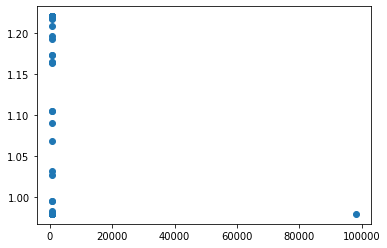

In [158]:
print(list_R0)
print(list_t)
plt.scatter(list_t, list_R0)
np.max(list_t)


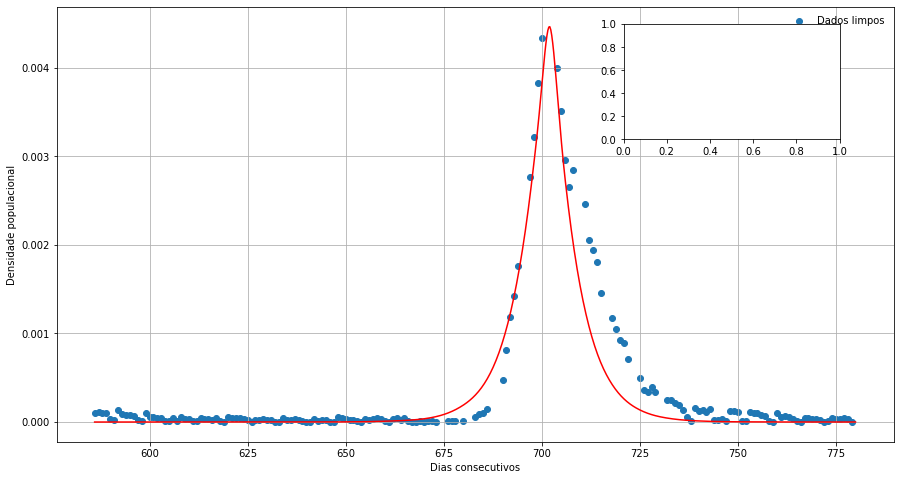

In [122]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 586
leste = 780

##############################

def sir(t, y):
    s, i, r = y
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt


t_pico =  702

coef_sub = 0.1615219031945897    # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao) #


##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
"""label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"""

ax2 = plt.axes([0.65,0.65,0.2,0.2])


In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp, odeint

/tmp/ipykernel_4050/460437782.py:7: RuntimeWarning: overflow encountered in exp
  R0 = t/np.exp((t/100))


(7.0, 12.0)

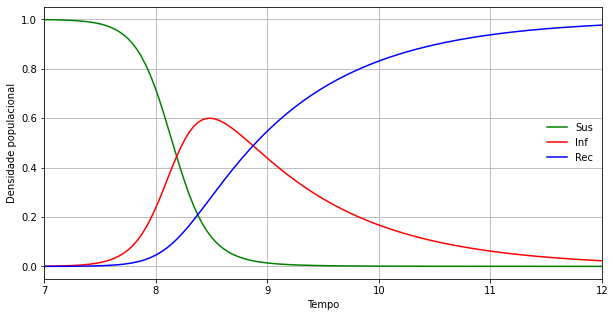

In [9]:

# SIR

def sir(t, y):
    s, i, r = y
    #R0 = np.exp((t**5)/100 - (np.exp(t))/100)
    
    R0 = t/np.exp((t/100))
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    #print(R0)
    return dsdt, didt, drdt

t0, t = 1, 40
i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,1000)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_xlim([7,12])

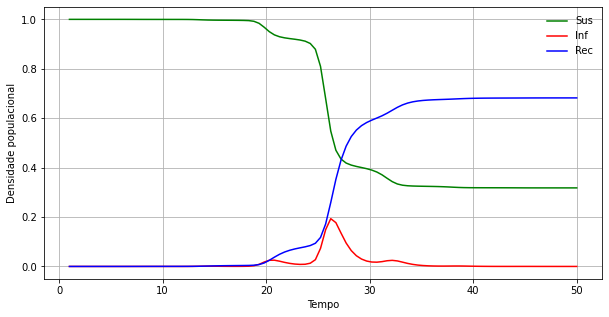

In [7]:
# SIR

def sir(t, y):
    s, i, r = y
    R0 = np.exp(t/100+np.cos(t))
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    #print(R0)
    return dsdt, didt, drdt

t0, t = 1, 50
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)

In [9]:
from scipy.constants import pi, c, Planck, k

In [10]:
from scipy.constants import Planck
Planck

6.62607015e-34

In [33]:
# Acima estão os gráficos completos
###################################3
# Abaixo estão os testes

In [35]:
import random
a = random.randint(1,10)
a

10

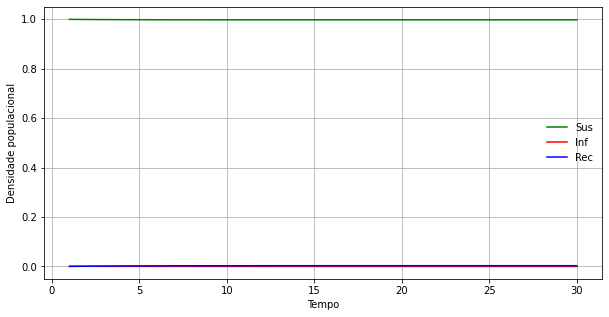

In [14]:

# SIR

def sir(t, y):
    s, i, r = y
    
    R0 = 2/6
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

t0, t = 1, 30
i0 = 1e-3
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)

"label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],\n          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]\nax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"

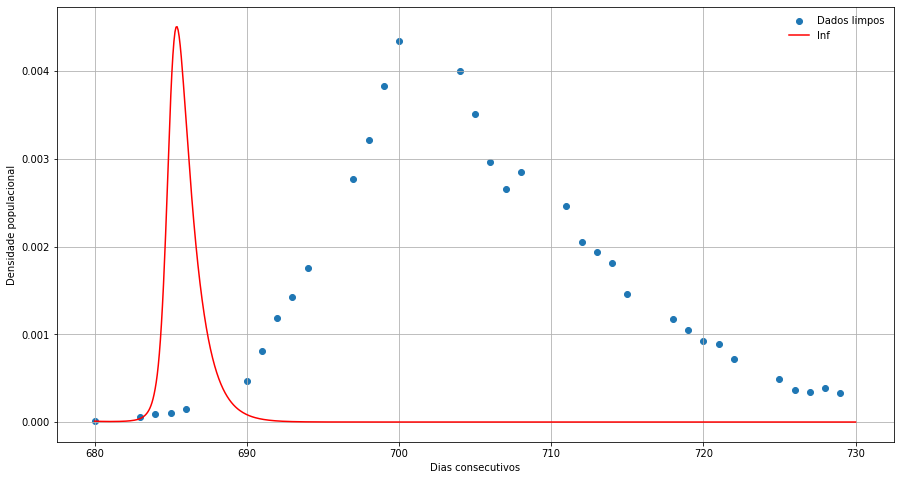

In [338]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 680
leste = 730

##############################

def sir(t, y):
    s, i, r = y
    R0 = (t-oeste)/np.exp(((t-oeste)/100))
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt


t0, t = oeste, leste
i0 = 1e-3
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao) #

inf = res.y[1]/100

##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

ax.plot(res.t, inf, 'r', label='Inf')


#ax.plot(res.t, res.y[0],'g', label='Sus')
#ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
"""label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"""


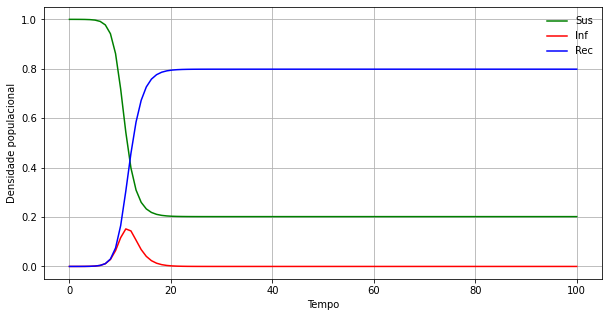

In [14]:
# SIR

def sir(t, y):
    s, i, r = y
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

R0 = 2
t0, t = 0, 100
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)

In [16]:
coef_sub = 0.1615219031945897
coef_des = -0.10162445674343068

t_pico = 100
var_pico = 10
resolução = 100

media = (coef_des+coef_sub)/2 # média
assintotas = coef_sub - deslocamento_x

x = np.linspace(t_pico-var_pico,t_pico+var_pico,resolução)
y = -np.tanh(x-t_pico)*assintotas + media
plt.plot(x,y)
plt.axhline(coef_sub,color='g')
plt.axhline(coef_des,color='r')

NameError: name 'deslocamento_x' is not defined

(0.0, 0.001)

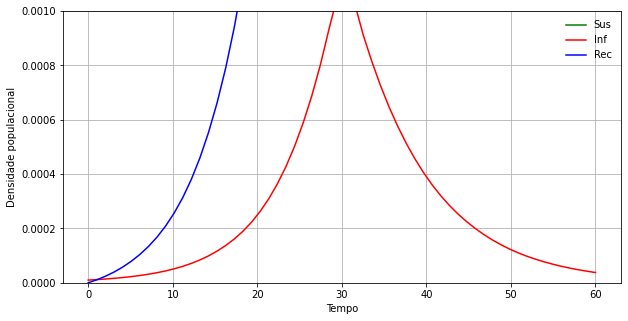

In [17]:
# SIR

def sir(t, y):
    s, i, r = y
    R0 = -np.tanh(t - t_pico)*assintotas + 1 + media # A dunção só usa 1 valor de R0
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

t_pico = 30 # Dado obtido pelos dados das cidades

coef_sub = 0.1615219031945897
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media

t0, t = 0, 60
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_ylim([0,1e-3])

In [18]:
t = 10
R0 = -np.tanh(t - t_pico)*assintotas + 1 + media
R0

1.1615219031945898

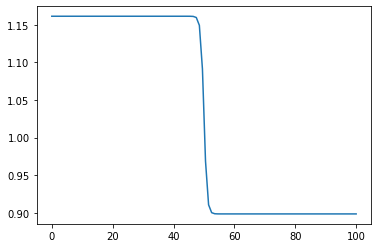

In [19]:
x = np.linspace(0,100,100)
y = -np.tanh(x - 50)*assintotas + 1 + media
plt.plot(x,y)

In [ ]:
res

(7.0, 16.0)

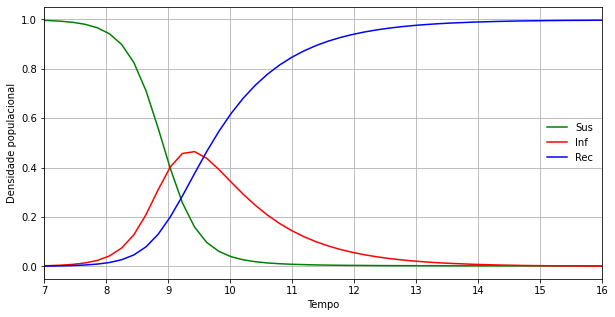

In [20]:
# SIR

def sir(t, y):
    s, i, r = y
    R0 = np.exp((t-1)/5)
    #R0 = np.log(2*t)
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

t0, t = 1, 40
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,200)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_xlim([7,16])

In [21]:

# SIR

def sir(t, y):
    s, i, r = y
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

#R0 = 1.1615219031945897

t0, t = 0, 20
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

R0 = np.exp(100/t)

t = np.linspace(0,20,20)

t_discreto = np.linspace(t0,t,50)

y0 = s0,i0,r0
res = odeint(sir, y0, t).T
#res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
   
print(res)    
"""fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
#ax.set_ylim([0,1e-1])"""

TypeError: cannot unpack non-iterable float object

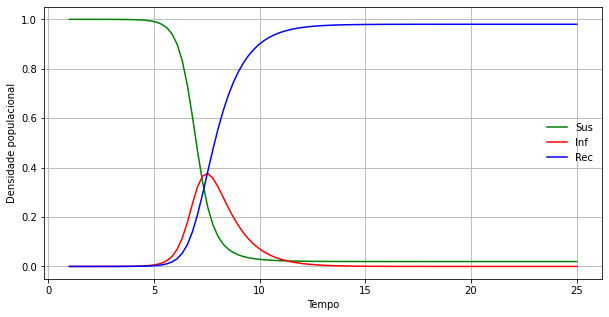

In [20]:
# SIR

def sir(t, y):
    s, i, r = y
    R0 = (t+2)**0.6
    #R0 = t**(2*np.cos(t))
    #R0 = np.exp(t)/np.cos(t)
    #R0 = np.log(2*t)
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    #print(R0)
    return dsdt, didt, drdt

t0, t = 1, 25
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
#ax.set_xlim([0,10])
#plt.yscale('log')

In [ ]:
res

Text(0.5, 1.0, 'R0 = exp{t}')

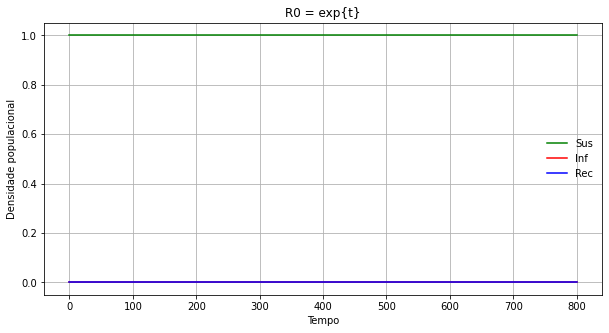

In [23]:
# SIR

def sir(t, y):
    s, i, r = y
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

R0 = 1.16
t0, t = 0, 800
i0 = 3.5058214e-52
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_title('R0 = exp{t}')

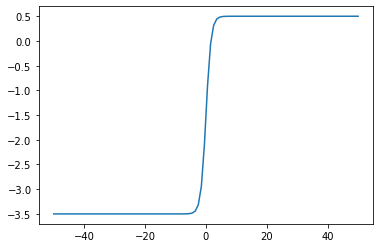

In [185]:
x = np.linspace(-50,50,100)
y = np.tanh(x*0.6)*2-1.5
plt.plot(x,y)

In [19]:
np.tanh((0, np.pi*1j, np.pi*1j/2))


array([0.+0.00000000e+00j, 0.-1.22464680e-16j, 0.+1.63312394e+16j])

In [ ]:
x = np.linspace(1,5,5)
x

Text(0.5, 1.0, 'Ajuste linear nos casos confirmados: Rio de Janeiro; 6775561 habitantes.')

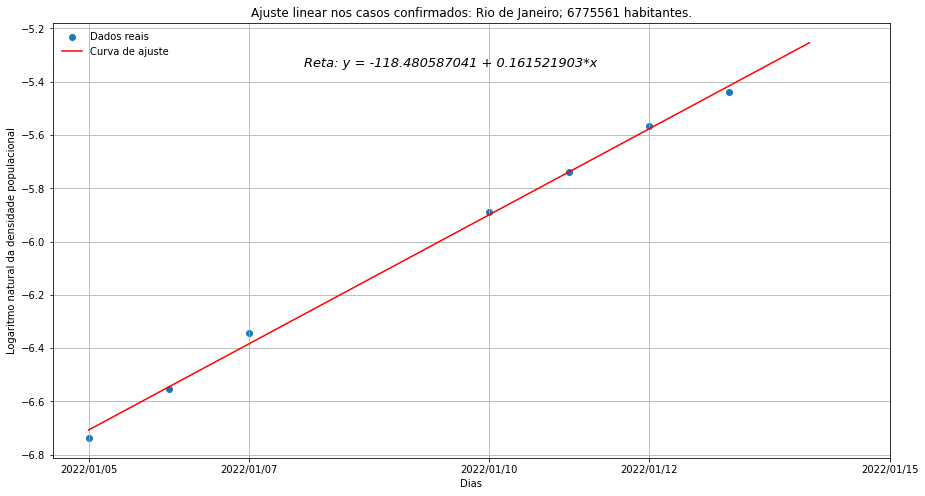

In [18]:
# Ajuste linear antes do pico


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

oeste = 692
leste = 702

##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

idx = np.isfinite(dados0_x_rio) & np.isfinite(dados0_y_rio_log)
coef1 = np.polynomial.polynomial.Polynomial.fit(dados0_x_rio[idx], dados0_y_rio_log[idx], 1)
c_linear_sub_rio, c_angular_sub_rio = coef1.convert().coef

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio_log, label='Dados reais')
ax.plot(dados0_x_rio, c_linear_sub_rio + c_angular_sub_rio*dados0_x_rio, 'r',label='Curva de ajuste')

ax.text(0.3, 0.9, f'Reta: y = {round(c_linear_sub_rio,9)} + {round(c_angular_sub_rio,9)}*x', fontsize=13,style='italic', transform=ax.transAxes)

ax.grid(True)
ax.set_ylabel('Logaritmo natural da densidade populacional')
ax.set_xlabel('Dias')
ax.legend(frameon=False)

label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

plt.title(f'Ajuste linear nos casos confirmados: {nome_cidade}; {população} habitantes.')

##plt.savefig('RJ_dados_ajuste_pré-pico.pdf')

Text(0.5, 1.0, 'Ajuste linear nos casos confirmados: Rio de Janeiro; 6775561 habitantes.')

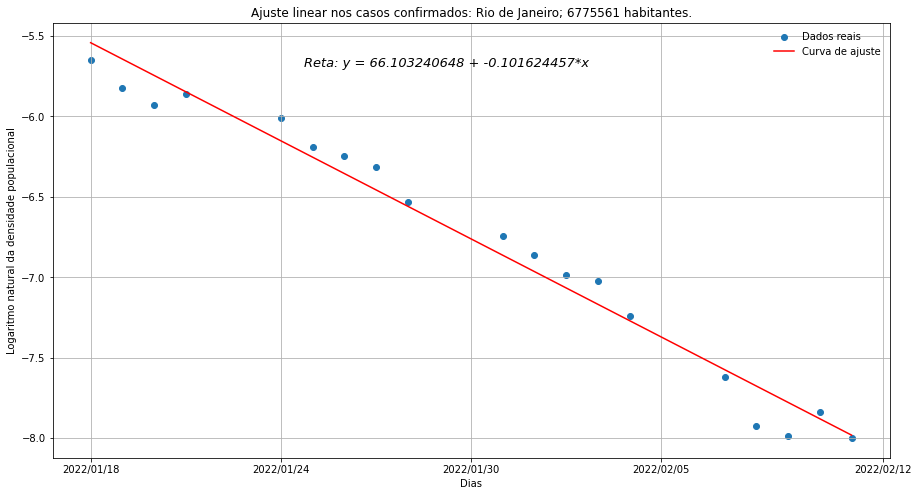

In [17]:
# Ajuste linear após o pico


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

oeste = 705
leste = 730
##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

idx = np.isfinite(dados0_x_rio) & np.isfinite(dados0_y_rio_log)
coef1 = np.polynomial.polynomial.Polynomial.fit(dados0_x_rio[idx], dados0_y_rio_log[idx], 1)
c_linear_des_rio, c_angular_des_rio = coef1.convert().coef


fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio_log, label='Dados reais')
ax.plot(dados0_x_rio, c_linear_des_rio + c_angular_des_rio*dados0_x_rio, 'r',label='Curva de ajuste')

ax.text(0.3, 0.9, f'Reta: y = {round(c_linear_des_rio,9)} + {round(c_angular_des_rio,9)}*x', fontsize=13,style='italic', transform=ax.transAxes)

ax.grid(True)
ax.set_ylabel('Logaritmo natural da densidade populacional')
ax.set_xlabel('Dias')
ax.legend(frameon=False)

label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

plt.title(f'Ajuste linear nos casos confirmados: {nome_cidade}; {população} habitantes.')

##plt.savefig('RJ_dados_ajuste_pós-pico.pdf')

In [ ]:
c_angular_sub_rio

In [ ]:
c_angular_des_rio

In [ ]:
media = (c_angular_des_rio+c_angular_sub_rio)/2
media

In [ ]:
assintotas = 0.1615219031945897 - media
margem

In [ ]:
margem = -0.10162445674343068 - media
margem

In [ ]:
x-tempo do pico

In [ ]:
#deslocamento_x = (c_angular_des_rio+c_angular_sub_rio)/2 # média
assintotas = c_angular_sub_rio - deslocamento_x
t_pico = 500
var_pico = 10
resolução = 100

x = np.linspace(t_pico-var_pico,t_pico+var_pico,resolução)
y = -np.tanh(x-t_pico)*assintotas + media
plt.plot(x,y)
plt.axhline(c_angular_sub_rio,color='g')
plt.axhline(c_angular_des_rio,color='r')
#plt.axvline(deslocamento_x,color='r')

(0.0, 1e-05)

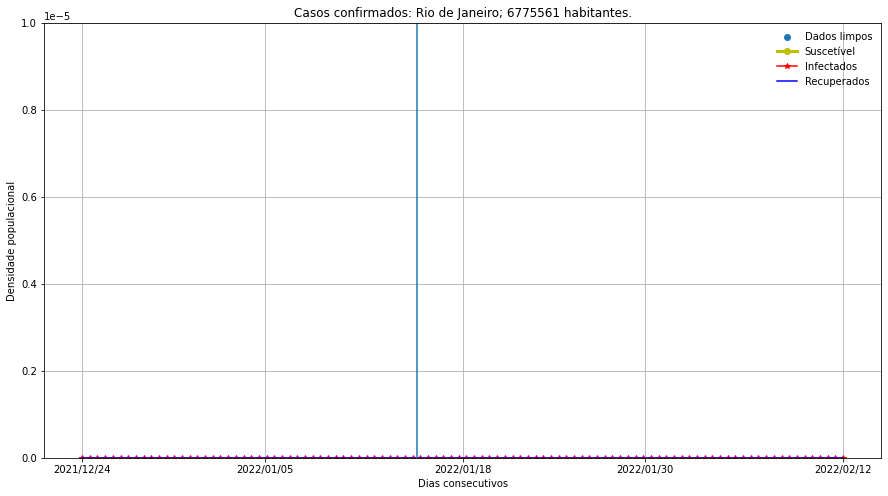

In [16]:
##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 680
leste = 730

##############################

# SIR

def sir(t, y):
    s, i, r = y
    R0 = -np.tanh(t - t_pico)*assintotas + 1 + media# A dunção só usa 1 valor de R0
    #R0 = -np.tanh(t)
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt

t_pico = 702 # Dado obtido pelos dados das cidades

coef_sub = 0.1615219031945897
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste 
i0 = 3.5058214e-52
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao)


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

ax.plot(res.t, res.y[0], 'o-y',lw=3, label='Suscetível')
ax.plot(res.t, res.y[1], '*-r', label='Infectados')
ax.plot(res.t, res.y[2], '-b', label='Recuperados')
ax.axvline(702)

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)
plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

ax.set_ylim([0,1e-5])

In [ ]:

# SIR

def sir(t, y):
    s, i, r = y
    #R0 = np.exp((t**5)/100 - (np.exp(t))/100)
    
    R0 = t/np.exp(t/100)
    k = 1/t

    dsdt = - R0 * s * i + k
    didt = R0 * s * i - i
    drdt = i
    print(R0)
    return dsdt, didt, drdt

t0, t = 1, 40
i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,1000)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
#ax.set_ylim([0,1e-1])

In [316]:
res.y[1]

array([ 3.50582137e-52,  6.33175357e-52,  9.15768577e-52,  1.19836180e-51,
        1.48095502e-51,  1.76354824e-51,  2.04614146e-51,  2.32873468e-51,
        2.61132790e-51,  2.89392112e-51,  3.17651434e-51,  3.45910756e-51,
        3.74170078e-51,  4.02429400e-51,  4.30688722e-51,  4.58948044e-51,
        4.87207366e-51,  5.15466688e-51,  5.43726010e-51,  5.71985332e-51,
        6.00244654e-51,  6.28503976e-51,  6.56763298e-51,  6.85022620e-51,
        7.13281942e-51,  3.23733776e-50,  3.27271765e-50,  3.31632126e-50,
        3.36814860e-50,  3.42819966e-50,  3.49647444e-50,  3.57297294e-50,
        3.65769517e-50,  3.75064112e-50,  3.85181080e-50,  3.96120419e-50,
        4.07882131e-50,  4.20466215e-50,  4.33872672e-50,  4.48101501e-50,
        4.63152702e-50,  4.79026275e-50,  4.95722221e-50,  5.13240539e-50,
        5.31581229e-50,  5.50744292e-50,  5.70729727e-50,  5.91537534e-50,
        6.13167713e-50,  6.35620265e-50,  6.49840258e-50,  6.32275352e-50,
        5.81708244e-50,  

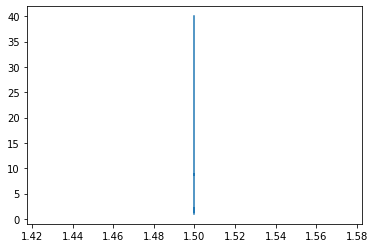

In [202]:
plt.plot(list_R0, list_t)

[1.64887236e-05 2.71636773e-05 4.48031697e-05 7.41519873e-05
 1.20866288e-04 1.97385682e-04 3.26005916e-04 5.38879293e-04
 8.84824754e-04 1.44596300e-03 2.36443497e-03 3.85279881e-03
 6.18447376e-03 9.84545357e-03]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


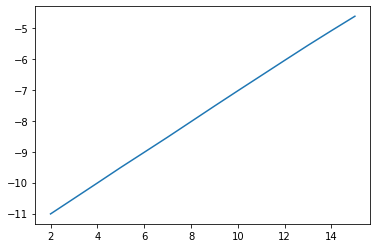

In [91]:
inf = res.y[1][1:15]
tme = res.t[1:15]
print(inf)
print(tme)
inf = np.log(inf)
plt.plot(tme, inf)

0.49349550398775505
-11.983041131948525


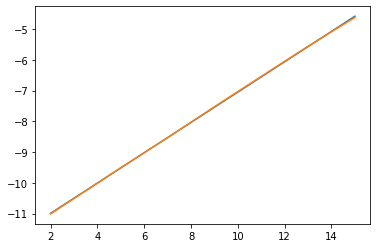

In [92]:
idx = np.isfinite(tme) & np.isfinite(inf)
coef1 = np.polynomial.polynomial.Polynomial.fit(tme[idx], inf[idx], 1)
c_linear, c_angular = coef1.convert().coef

plt.plot(tme, c_linear + c_angular*tme)
plt.plot(tme, inf)
print(c_angular)
print(c_linear)

In [111]:
import numpy as np
co = np.polyfit(tme, inf,1)
co

array([  0.4934955 , -11.98304113])

In [94]:
R0 = c_angular+1
R0

1.493495503987755

In [98]:
i0 = np.exp(c_linear)
i0

6.249299803396446e-06

"label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],\n          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]\nax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"

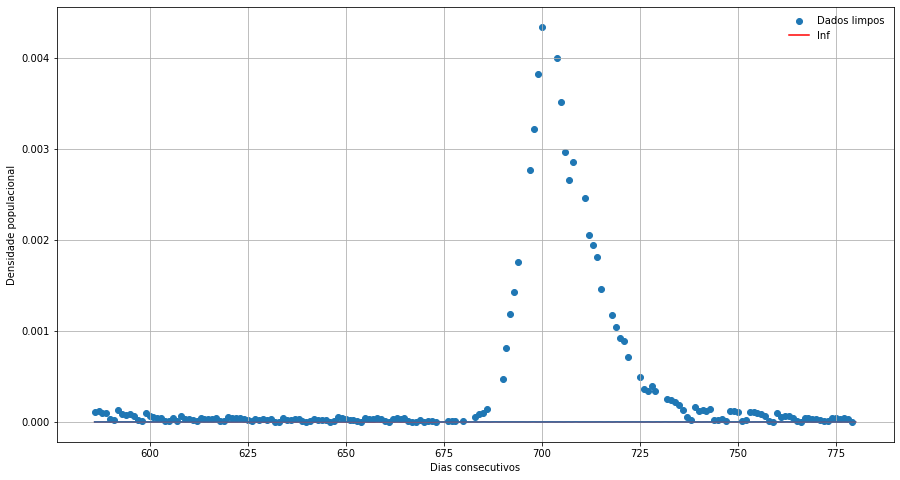

In [22]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 586
leste = 780

##############################

def sir(t, y):
    s, i, r, h = y
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    dsdt = - R0 * s * i
    didt = R0 * s * i - i - p*i
    drdt = i 
    dhdt = p*r
    return dsdt, didt, drdt, dhdt


t_pico =  702

coef_sub = 0.1615219031945897    # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media

p = 1.5

t0, t = oeste, leste
i0 = 1e-10
r0 = 0
h0 = 0
s0 = 1 - i0 - r0 - h0

resolucao = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0, h0], t_eval=resolucao) #


##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.plot(res.t, res.y[3])

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
"""label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"""

#ax.set_ylim([0,5e-3])

#plt.yscale('log')

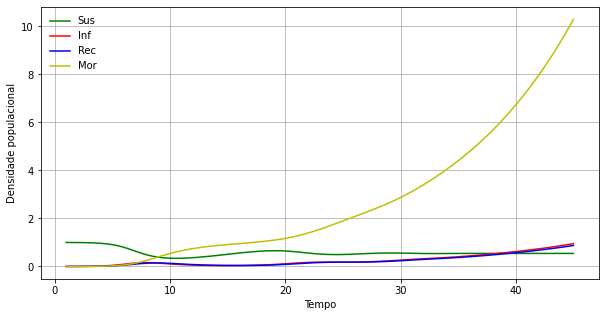

In [101]:

# SIR

def sir(t, y):
    s, i, r, z, g = y
    R0 = 2
    dgdt = - l*z
    dsdt = - R0 * s * i + l*z
    didt = R0 * s * i - i
    drdt = i - m*r
    dzdt = m*r
    return dsdt, didt, drdt, dzdt, dgdt

p = 0.1
l = 0.1
m = 1

t0, t = 1, 45
i0 = 1e-3
r0 = 0
z0 = 0
g0 = 0
s0 = 1 - i0 - r0 - z0 - g0

resolucao = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0, z0, g0], t_eval=resolucao) #
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.plot(res.t, res.y[3], 'y', label='Mor')
#ax.plot(res.t, res.y[4], 'p', label='Iso')


ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
#ax.set_ylim([0,1e-1])

(675.0, 750.0)

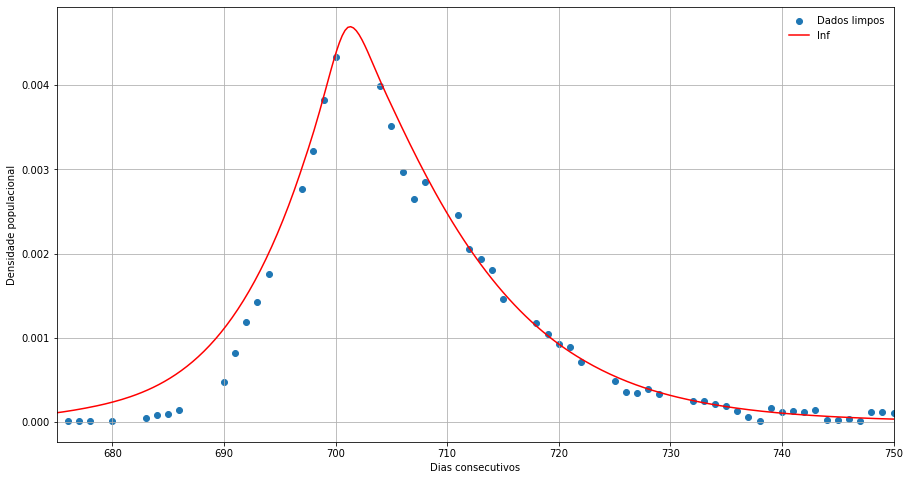

In [61]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 583
leste = 780

##############################

def sir(t, y):
    s, i, r = y
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt


t_pico =  701

coef_sub = 0.16    # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.02

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao) #


##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
"""label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)"""

#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([675,750])